# `example4_regularized_regression`


타깃: 1년 후 당뇨병 진행 정도(quantitative measure of disease progression)

| 특성명 (feature\_names) | 의미                                         | 단위(원본)       |
| -------------------- | ------------------------------------------ | ------------ |
| `age`                | 나이                                         | 연도(year)     |
| `sex`                | 성별                                         | M/F → 숫자 인코딩 |
| `bmi`                | 체질량지수 (Body Mass Index)                    | kg/m²        |
| `bp`                 | 평균 혈압 (Average Blood Pressure)             | mmHg         |
| `s1`                 | 혈청 지표 1 (e.g., T-Cells)                    | —            |
| `s2`                 | 혈청 지표 2 (e.g., LDL cholesterol)            | —            |
| `s3`                 | 혈청 지표 3 (e.g., HDL cholesterol)            | —            |
| `s4`                 | 혈청 지표 4 (e.g., total cholesterol/HDL)      | —            |
| `s5`                 | 혈청 지표 5 (e.g., log of serum triglycerides) | —            |
| `s6`                 | 혈청 지표 6 (e.g., blood sugar level)          | —            |


타깃(target)

당뇨병 진행 정도를 수치화한 값

단위는 연구 고유의 임상 점수(scale)에 해당하며,

값이 클수록 1년 후 당뇨 진행이 더 심각함을 의미

■ First 5 rows of the dataset:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



■ Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612



■ Ridge RMSE: 55.711, R²: 0.392
■ Lasso RMSE: 55.810, R²: 0.389


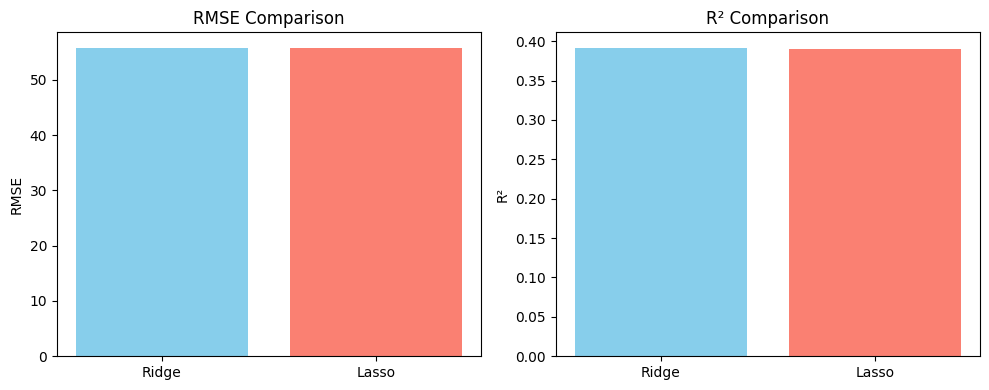

In [ ]:
# Example 4: Regularized Regression (Ridge & Lasso) on Diabetes Dataset

# 1) 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 2) 데이터 로드 및 DataFrame 생성
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # 1년 후 당뇨 진행 정도

# 3) 데이터 확인
print("■ First 5 rows of the dataset:")
display(df.head())

print("\n■ Summary statistics:")
display(df.describe().T)

# 4) 특성(feature)과 타깃(target) 정의
X = df.drop('target', axis=1)
y = df['target']

# 5) 학습/테스트 분리 (30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# 6) 특성 스케일링 (평균=0, 분산=1)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# 7) 모델 생성 및 학습
ridge = Ridge(alpha=1.0)    # 릿지 회귀
lasso = Lasso(alpha=1.0)    # 라쏘 회귀
ridge.fit(X_train_s, y_train)
lasso.fit(X_train_s, y_train)

# 8) 예측 및 평가 지표 계산
y_pred_r = ridge.predict(X_test_s)
y_pred_l = lasso.predict(X_test_s)
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_l))
r2_r   = r2_score(y_test, y_pred_r)
r2_l   = r2_score(y_test, y_pred_l)

print(f"\n■ Ridge RMSE: {rmse_r:.3f}, R²: {r2_r:.3f}")
print(f"■ Lasso RMSE: {rmse_l:.3f}, R²: {r2_l:.3f}")

# 9) RMSE와 R² 비교 시각화
models      = ['Ridge', 'Lasso']
rmse_values = [rmse_r, rmse_l]
r2_values   = [r2_r,   r2_l]
x = np.arange(len(models))

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(x, rmse_values, color=['skyblue','salmon'])
plt.xticks(x, models)
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

plt.subplot(1, 2, 2)
plt.bar(x, r2_values, color=['skyblue','salmon'])
plt.xticks(x, models)
plt.ylabel('R²')
plt.title('R² Comparison')

plt.tight_layout()
plt.show()


In [17]:
coef_df = pd.DataFrame( {
    'feature': diabetes.feature_names,
    'ridge_coef': ridge.coef_,
    'lasso_coef': lasso.coef_
})
display(coef_df)

,feature,ridge_coef,lasso_coef
0,age,-2.482135,-2.319148
1,sex,-9.156631,-8.973389
2,bmi,27.977149,28.107081
3,bp,12.915933,12.730206
4,s1,-17.888203,-13.350576
5,s2,6.745040,3.184939
6,s3,-6.046448,-8.066728
7,s4,3.468214,2.619514
8,s5,33.024448,31.484141
9,s6,1.433450,1.292864


In [11]:
print("릿지 회귀 회귀 계수 (Coefficients)")
for name, coef in zip(diabetes.feature_names, ridge.coef_):
    print(f" {name}: {coef:.3f}")
print("절편(intercept):" , ridge.intercept_.round(3))

print("라쏘 회귀 회귀 계수 (Coefficients)")
for name, coef in zip(diabetes.feature_names, lasso.coef_):
    print(f" {name}: {coef:.3f}")
print("절편(intercept):" , lasso.intercept_.round(3))

릿지 회귀 회귀 계수 (Coefficients)
 age: -2.482
 sex: -9.157
 bmi: 27.977
 bp: 12.916
 s1: -17.888
 s2: 6.745
 s3: -6.046
 s4: 3.468
 s5: 33.024
 s6: 1.433
절편(intercept): 152.12
라쏘 회귀 회귀 계수 (Coefficients)
 age: -2.319
 sex: -8.973
 bmi: 28.107
 bp: 12.730
 s1: -13.351
 s2: 3.185
 s3: -8.067
 s4: 2.620
 s5: 31.484
 s6: 1.293
절편(intercept): 152.12


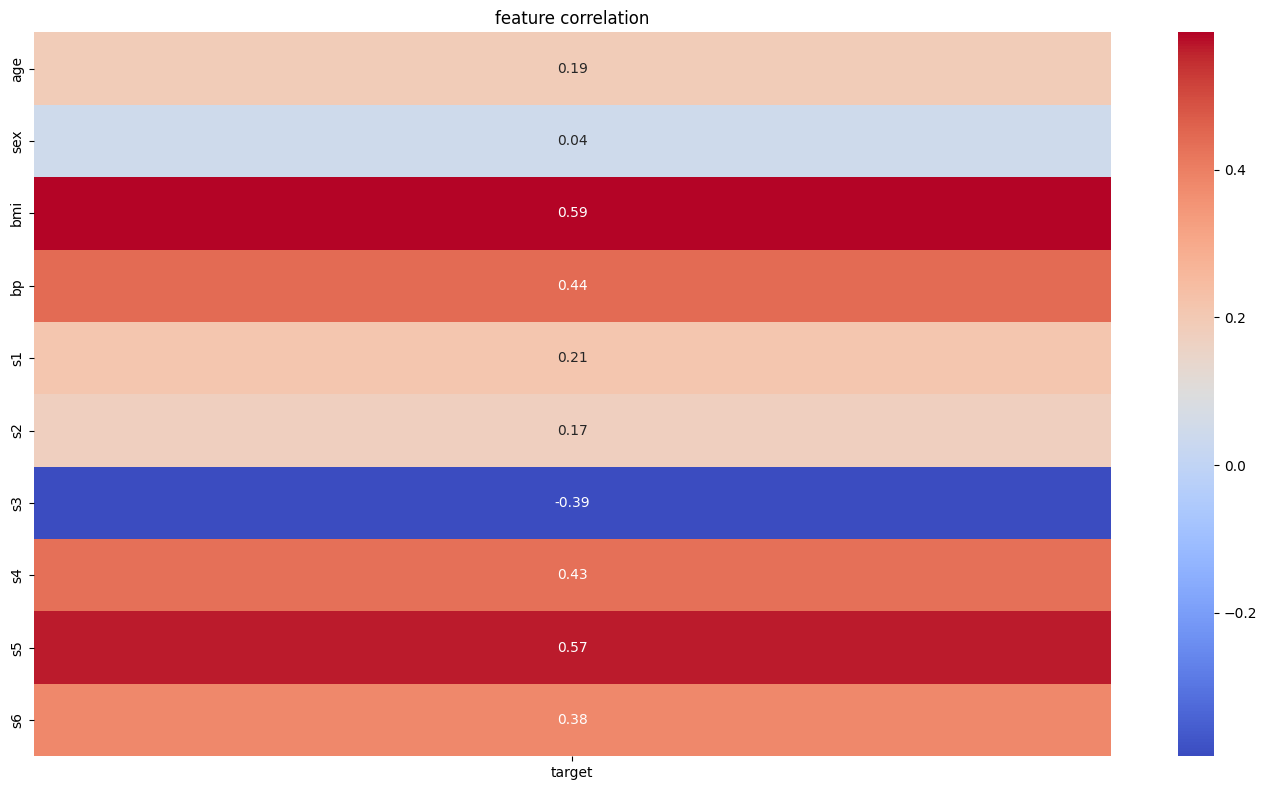

In [18]:
# 상관관계 분석

import seaborn as sns
import pandas as pd


# 상관계수 계산 (숫자형 변수들에 대해서만)
correlation_matrix = df.corr(numeric_only=True)
# 흡연자여부 상관관계만 추출 (자기 자신 제외)
corr = correlation_matrix[["target"]].drop('target')


# 히트맵 2개를 나란히 그리기
fig, axes = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, ax=axes)
axes.set_title("feature correlation")
plt.tight_layout()
plt.show()

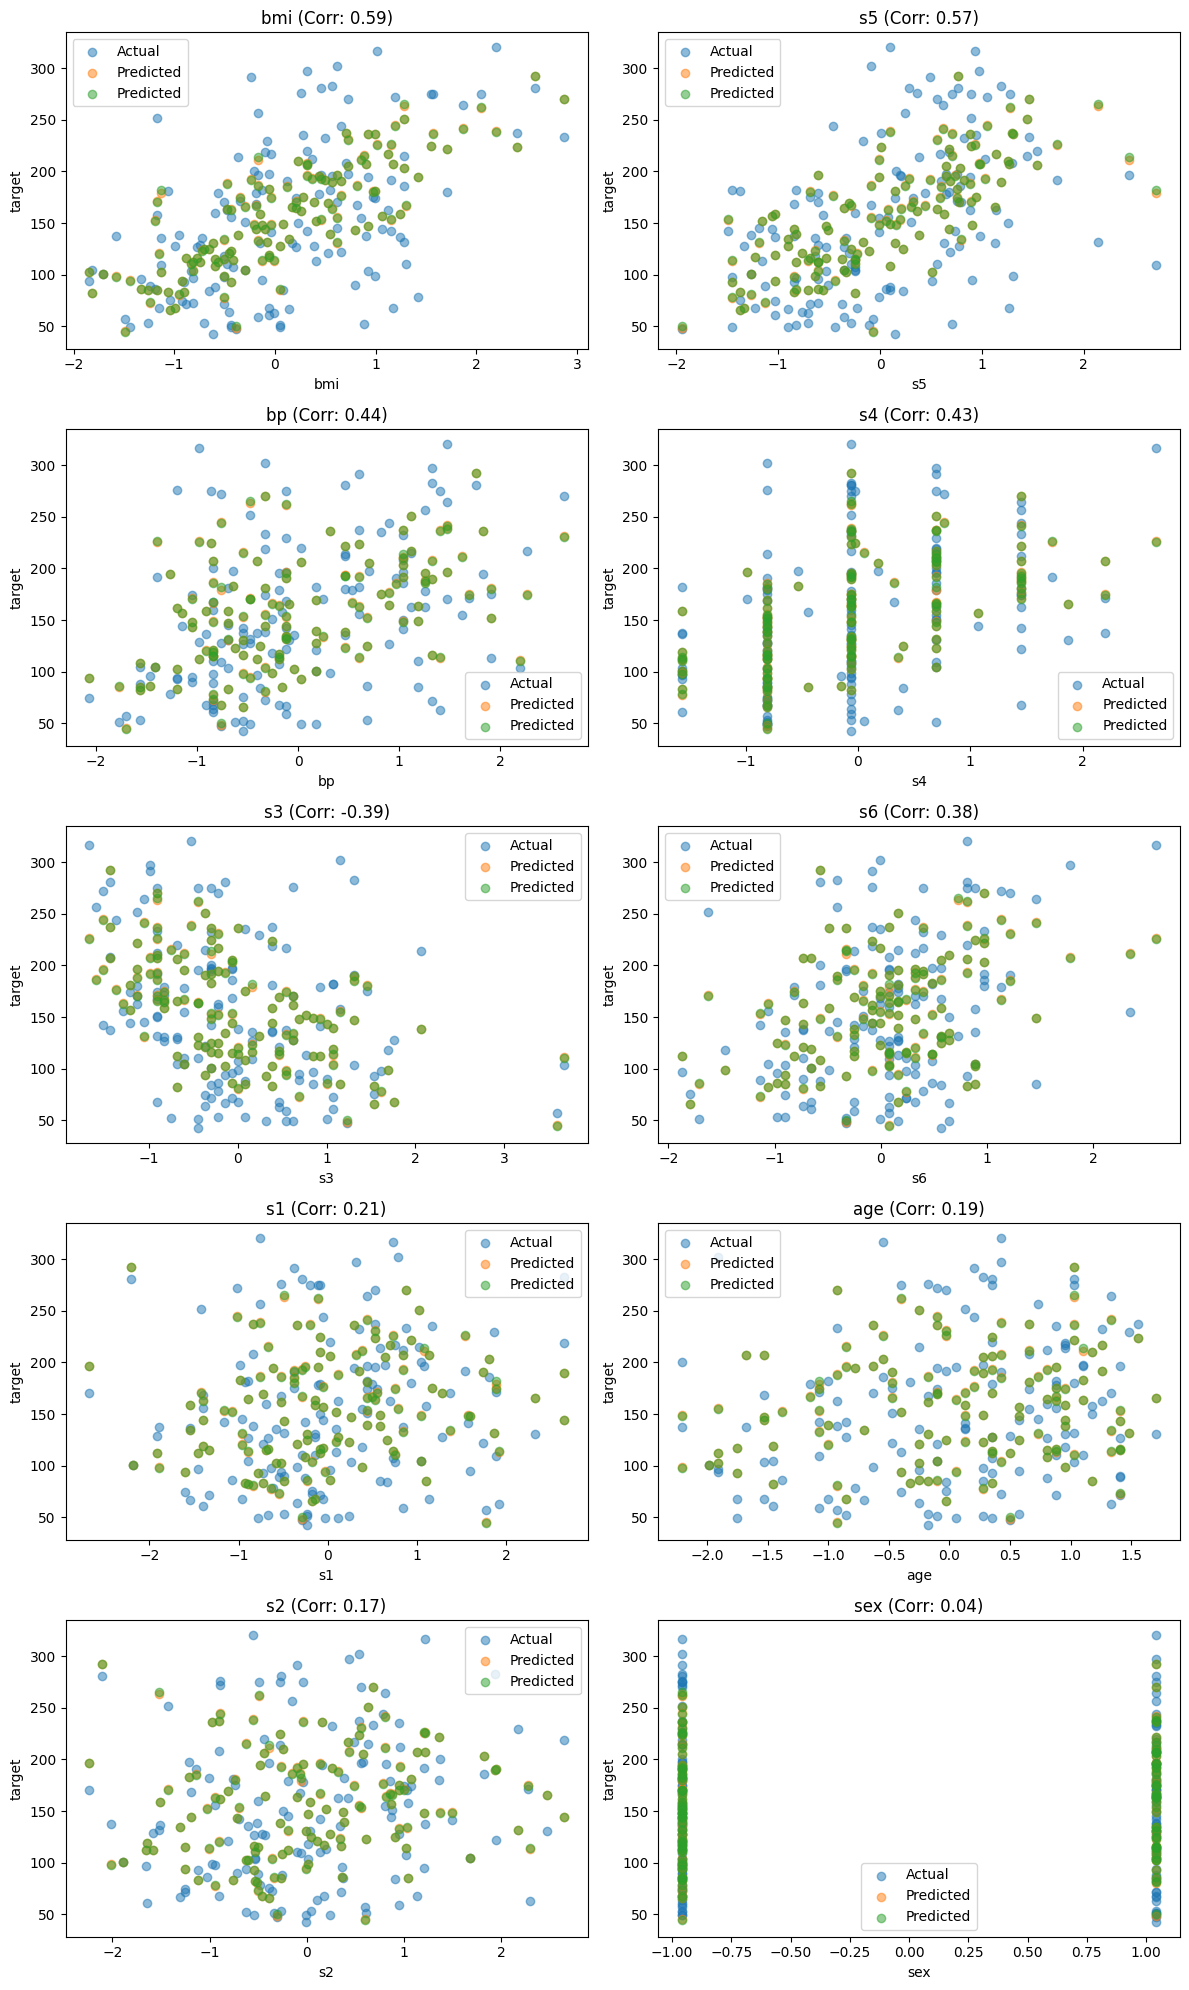

In [22]:
#상관관계 분석

# 독립변수별 예측, 실제 산점도
corr_matrix = df.corr(numeric_only=True)
corrs = corr_matrix['target'].abs().drop('target').sort_values(ascending=False)
features_sorted = corrs.index.tolist()

plt.figure(figsize=(12, 20))
for idx, feat in enumerate(features_sorted):
    plt.subplot(5, 2, idx+1)
    feat_idx = diabetes.feature_names.index(feat)
    plt.scatter(X_test_s[:, feat_idx], y_test, alpha=0.5, label='Actual')
    plt.scatter(X_test_s[:, feat_idx], y_pred_r, alpha=0.5, label='Predicted')
    plt.scatter(X_test_s[:, feat_idx], y_pred_l, alpha=0.5, label='Predicted')
    plt.xlabel(feat)
    plt.ylabel('target')
    plt.title(f"{feat} (Corr: {corr_matrix.loc[feat, 'target']:.2f})")
    plt.legend()
plt.tight_layout()
plt.show()